## Введение в нейронные сети 2

## Keras
#### Задание:
1. Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете fashion_mnist с другими параметрами.
2. Какого результата вы добились от нейросети?
3. Что помогло вам улучшить её точность?
4. Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

In [2]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.20.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-au


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498463 sha256=0b88847155051ac10437722d100d6bd0fc6f9b217e2654dda001adb6ec06b5e6
  Stored in directory: c:\users\инна\appdata\local\pip\cache\wheels\ca\6c\0b\dab434867ee492673dd15dbf9f6cce85781b555432a92bfb10
Successfully built jax


In [5]:
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import itertools

%matplotlib inline

In [6]:
tf.random.set_seed(1)

In [7]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 0


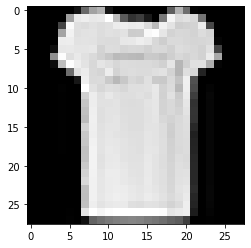

In [8]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

Дано: коллекция из 60 000 полутоновых изображений 28х28 серого цвета. Всего 10 категорий (кластеров) товаров, а также тестовыйая колекция из 10 000 изображений.<br>
Классовые метки:<br>
   * 0 - футболка<br>
   * 1 - Брюки<br>
   * 2 - Пуловер<br>
   * 3 - Платье<br>
   * 4 - Пальто<br>
   * 5 - Сандалия<br>
   * 6 - Рубашка<br>
   * 7 - Кроссовок<br>
   * 8 - Сумка<br>
   * 9 - Ботинок

Конвертируем значения пикселей из вида от 0 до 255 в набор значений от 0 до 1.

In [9]:
X_train.min(), X_train.max()

(0, 255)

In [10]:
# Нормирование данных

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [11]:
# Вытягивание признаков в массив одномерных векторов
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Передача данных для обучения нейросети

In [12]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [13]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Подбор количества нейронов для двухслойной нейронной сети

Проверка качества в зависимости от числа нейронов в слое (для 2-х слойной сети).

In [14]:
%%time
results_num = pd.DataFrame()
n_nums = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []


for n_num in list(map(lambda x: 2**x, range(0,10))):
    
    n_nums.append(n_num)
    
    model = Sequential([
        Dense(98, input_shape=(28 * 28,), activation='relu'),
        Dense(n_num, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=7,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_num['n_num'] = n_nums
results_num['train_loss'] = train_losses
results_num['test_loss'] = test_losses
results_num['train_metric'] = train_metrics
results_num['test_metric'] = test_metrics
results_num.sort_values(by='test_metric', ascending=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 98)                76930     
                                                                 
 dense_1 (Dense)             (None, 1)                 99        
                                                                 
 dense_2 (Dense)             (None, 10)                20        
                                                                 
Total params: 77,049
Trainable params: 77,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
938/938 [==============================] - 7s 6ms/step - loss: 2.1144 - accuracy: 0.1617 - val_loss: 2.0304 - val_accuracy: 0.1782
Epoch 2/7
938/938 [==============================] - 5s 5ms/step - loss: 1.9834 - accuracy: 0.2110 - val_loss: 1.9527 - val_accuracy: 0.2082
Epoch 3/7
938/938 [===============

                                                                 
 dense_13 (Dense)            (None, 16)                1584      
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
Total params: 78,684
Trainable params: 78,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
938/938 [==============================] - 6s 6ms/step - loss: 0.9979 - accuracy: 0.6930 - val_loss: 0.6647 - val_accuracy: 0.7784
Epoch 2/7
938/938 [==============================] - 5s 5ms/step - loss: 0.5700 - accuracy: 0.8084 - val_loss: 0.5576 - val_accuracy: 0.8105
Epoch 3/7
938/938 [==============================] - 5s 5ms/step - loss: 0.5076 - accuracy: 0.8251 - val_loss: 0.5422 - val_accuracy: 0.8045
Epoch 4/7
938/938 [==============================] - 5s 5ms/step - loss: 0.4756 - accuracy: 0.8328 - val_loss: 

                                                                 
Total params: 104,844
Trainable params: 104,844
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
938/938 [==============================] - 7s 6ms/step - loss: 0.9601 - accuracy: 0.6987 - val_loss: 0.6665 - val_accuracy: 0.7659
Epoch 2/7
938/938 [==============================] - 6s 6ms/step - loss: 0.5744 - accuracy: 0.8055 - val_loss: 0.5545 - val_accuracy: 0.8071
Epoch 3/7
938/938 [==============================] - 6s 6ms/step - loss: 0.5078 - accuracy: 0.8247 - val_loss: 0.5572 - val_accuracy: 0.8009
Epoch 4/7
938/938 [==============================] - 6s 6ms/step - loss: 0.4746 - accuracy: 0.8345 - val_loss: 0.4987 - val_accuracy: 0.8235
Epoch 5/7
938/938 [==============================] - 6s 6ms/step - loss: 0.4511 - accuracy: 0.8420 - val_loss: 0.4722 - val_accuracy: 0.8317
Epoch 6/7
938/938 [==============================] - 6s 6ms/step - loss: 0.4339 - accuracy:

,n_num,train_loss,test_loss,train_metric,test_metric
6,64,0.418702,0.457814,0.851383,0.8358
8,256,0.415714,0.454421,0.853617,0.8357
4,16,0.420418,0.460700,0.849433,0.8350
7,128,0.423226,0.461375,0.849483,0.8342
9,512,0.425076,0.467320,0.849083,0.8323
5,32,0.427529,0.466056,0.849150,0.8322
3,8,0.443281,0.482084,0.843067,0.8293
2,4,0.514434,0.552820,0.818533,0.8061
1,2,0.969149,0.988019,0.621717,0.6155
0,1,1.723529,1.736898,0.339133,0.3405


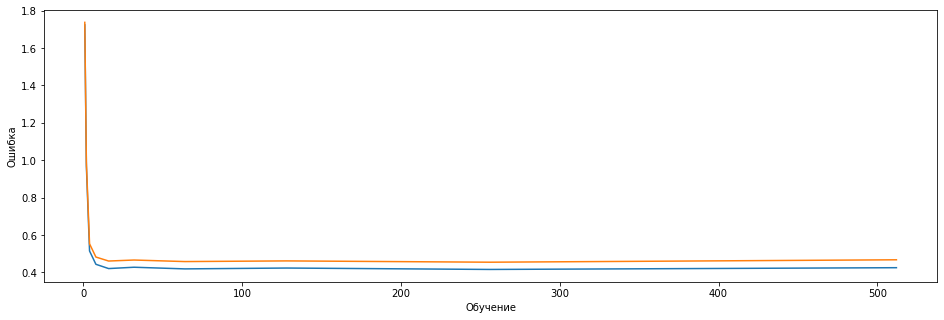

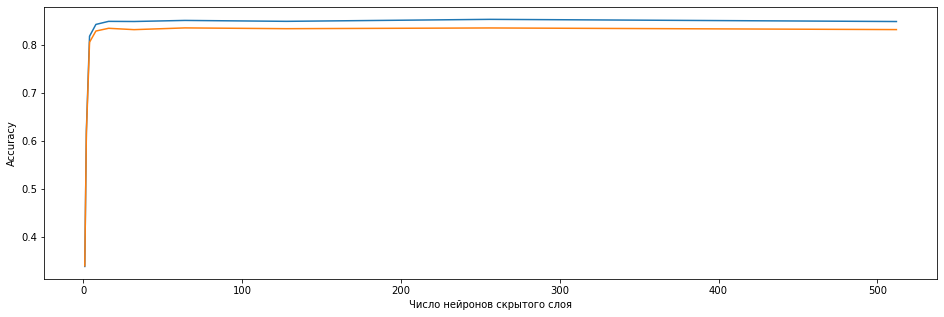

In [15]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'],results_num['train_loss'], label='train')
plt.plot(results_num['n_num'],results_num['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'],results_num['train_metric'], label='train')
plt.plot(results_num['n_num'],results_num['test_metric'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.show()

Лучшее качество на трейне получилось при 256 нейронах.<br> А на тесте при 64-х, но разница метрики в 0.0001 можно опустить.
Тендениция обучения: сначала, при увеличении числа нейронов скрытого слоя, качество росло, затем, начиная с некоторого количества (примерно 32), качество стало уменьшаться.

### Подбор количества слоёв

Проверим качество в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров)

Уменьшим количество эпох до 5

In [16]:
%%time
results_layers = pd.DataFrame()
n_nums = [] # число нейронов скрытых слоев
n_layers = [] # число скрытых слоев
n_pars = [] # число тренируемых параметров
train_losses = [] # ошибка на тренировочной выборке
test_losses = [] # ошибка на тестовой выборке
train_metrics = [] # accuracy на тренировочной выборке
test_metrics = [] # accuracy на тестовой выборке

# Базовый размер возьмем для двухслойной сети с 256 нейронами, и будем равняться на него
# Подберём количество нейронов так, чтобы количество параметров было примерно одинаково
k_dict = {2:256, 3:162, 5:101, 10:64}
for n in [2, 3, 5, 10]:
    
    k = k_dict[n]
    net_size = 64 * 785 + 65 * k + (n - 2) * (k + 1) * k + (k + 1) * 10
    n_nums.append(k) 
    n_pars.append(net_size)
    n_layers.append(n)
    
    model = Sequential()
    model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
    for i in range(n - 1):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['n_par'] = n_pars
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 256)               16640     
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 69,450
Trainable params: 69,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 1.0025 - accuracy: 0.6766 - val_loss: 0.6845 - val_accuracy: 0.7582
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.5927 - accuracy: 0.7979 - val_loss: 0.5687 - val_accuracy: 0.8045
Epoch 3/5
938/938 [============

157/157 [==============================] - 1s 5ms/step - loss: 0.5247 - accuracy: 0.8098
CPU times: total: 5min 43s
Wall time: 2min 33s


,n_layer,n_num,n_par,train_loss,test_loss,train_metric,test_metric
1,3,162,88806,0.429705,0.465926,0.848217,0.8347
2,5,101,88731,0.429714,0.466799,0.845417,0.8327
0,2,256,69450,0.446776,0.482975,0.844733,0.8299
3,10,64,88330,0.481639,0.524703,0.826333,0.8098


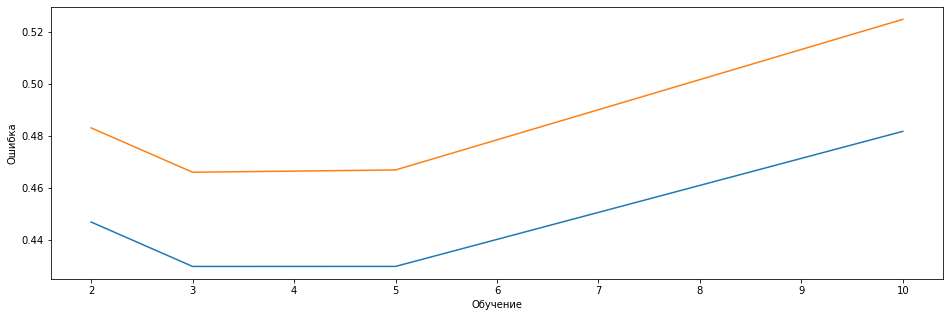

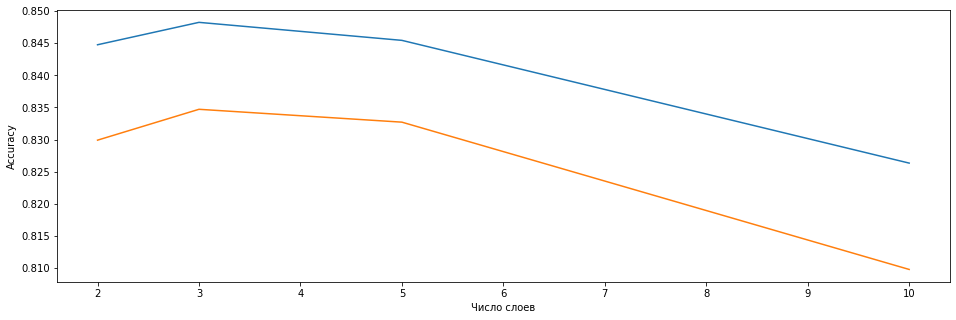

In [17]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.show()

Лучшее качество получилось на 3 слоях со 162 нейронами.<br>
На 10 слоях качество самое низкое. Может быть это связано с тем, что количество нейронов скрытых слоев меньше необходимого уровня, чтобы сохранить общее количество тренируемых параметров.

### Сохранение модели и оптимизаторы

Оптимизаторы: (SGD, Adam, RMSProp) для данной модели.

Оптимизатор: SGD
Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 1.0345 - accuracy: 0.6510 - val_loss: 0.6972 - val_accuracy: 0.7531
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5811 - accuracy: 0.7990 - val_loss: 0.5538 - val_accuracy: 0.8075
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5101 - accuracy: 0.8223 - val_loss: 0.6116 - val_accuracy: 0.7818
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.4737 - accuracy: 0.8343 - val_loss: 0.4939 - val_accuracy: 0.8244
Epoch 5/5
157/157 [==============================] - 1s 5ms/step - loss: 0.4789 - accuracy: 0.8264
Качество на тесте: 0.4789201319217682, 0.8263999819755554
Оптимизатор: RMSprop
Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.5334 - accuracy: 0.8041 - val_loss: 0.5240 - val_accuracy: 0.8149
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3809 - accuracy: 0.8600 -

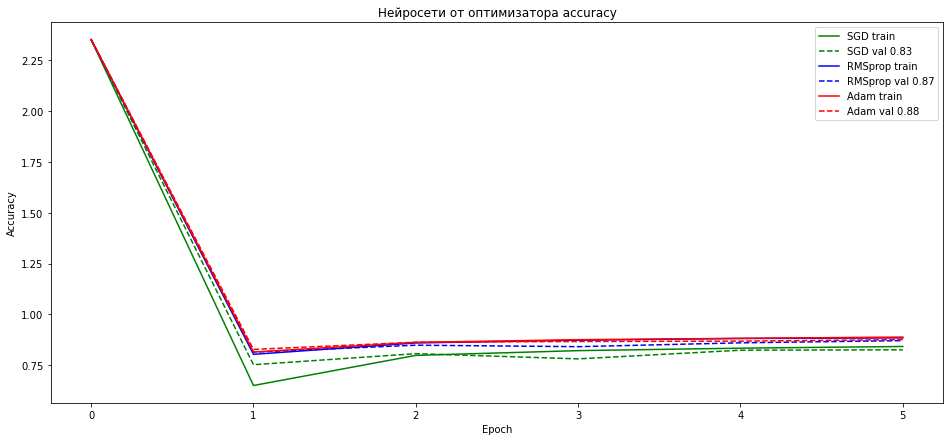

CPU times: total: 5min 29s
Wall time: 2min 12s


In [18]:
%%time

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(28 * 28,)),
    Dense(162, activation='relu'),
    Dense(162, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 5
batch_size = 64

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([SGD(),
                             RMSprop(),
                             Adam()]):
    print(f'Оптимизатор: {i_optim.get_config()["name"]}')
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(28 * 28,)),
        Dense(162, activation='relu'),
        Dense(162, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # вычисляем ошибку для modeli после обучения
    loss, metric = model_i.evaluate(X_test, y_test, batch_size=64)
    print(f'Качество на тесте: {loss}, {metric}')
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    
    # картинки
    '''
    plt.figure(figsize=(16, 7))
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    '''
    
    plt.plot(epoch, ([h0_train[0]] + h.history['accuracy']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, ([h0_val[0]] + h.history['val_accuracy']),
             '--', c=colors[i],
             label=f'{model_i.optimizer.get_config()["name"]} val {metric:.2f}')

plt.legend()
plt.title('Нейросети от оптимизатора accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Результаты

Итоговое качество на тестовой выборке получилось 0.88 благодаря подбору оптимального количества скрытых слоев (2) и количества нейронов на них (162), а также выбору оптимизатора (Adam). 

Количество эпох установлено (5), время обучения (5min 29s), что не плохо для нашей сети с прогоном на трех избранных оптимизаторах. Оптимизатор Adam показал наилучший результат, чуть хуже выступил оптимизатор RMSprop, с результатом (0.8714), тут больше во внимание можно принимать размер ошибки, с разницей в 0.04. 

In [19]:
model_i = models['Adam']

In [20]:
model_i.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

1/1 [==============================] - 0s 262ms/step


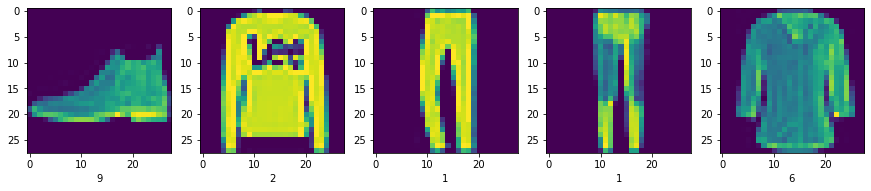

In [21]:
N = 5
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  #plt.xlabel(str(y_pred_class[i]))
  plt.xlabel(str(y_test_labels[i]))
plt.show() 

## Предсказание модели

In [22]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [23]:
y_pred = model_i.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


#### Рассмотрим матрицу ошибок 

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


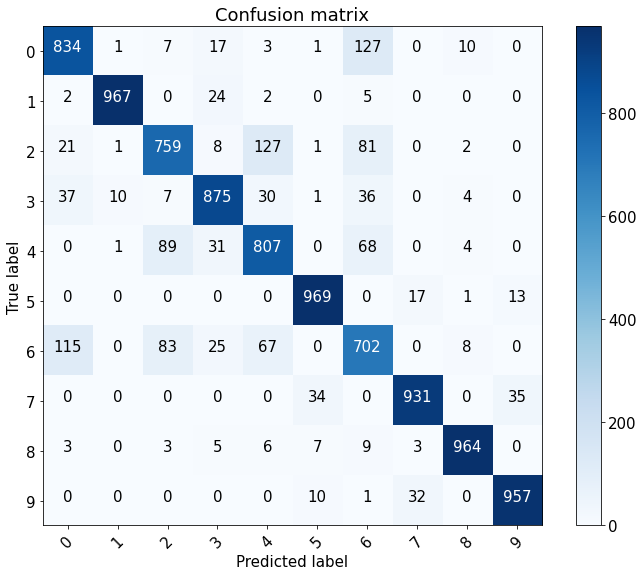

In [25]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

Модель часто путает 0 и 6 (футболки и рубашки) 2 и 4 (пуловер и пальто) 2 и 6 (пуловер и рубашки)

Составим сводную таблицу метрик согласно матрице ошибок по предсказаниям модели

In [26]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [27]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

In [28]:
pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
5,5,0.969,0.947214
1,1,0.967,0.986735
8,8,0.964,0.970796
9,9,0.957,0.952239
7,7,0.931,0.947101
3,3,0.875,0.888325
0,0,0.834,0.824111
4,4,0.807,0.774472
2,2,0.759,0.800633
6,6,0.702,0.682216


Согласно таблице точности, лучше всего мы распознаем (1) - брюки и (8) - сумки, а хуже всего (6) - рубашки

In [29]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,precision,recall
1,1,0.967,0.986735
8,8,0.964,0.970796
9,9,0.957,0.952239
5,5,0.969,0.947214
7,7,0.931,0.947101
3,3,0.875,0.888325
0,0,0.834,0.824111
2,2,0.759,0.800633
4,4,0.807,0.774472
6,6,0.702,0.682216


Согласно таблице качества, лучше всего мы распознаем (1) - брюки и (8) - сумки, а хуже всего (6) - рубашки

In [36]:
d = {0: 'Футболка',
     1: 'Брюки',
     2: 'Пуловер',
     3: 'Платье',
     4: 'Пальто',
     5: 'Сандалия',
     6: 'Рубашка',
     7: 'Кроссовок',
     8: 'Сумка',
     9: 'Ботинок'}

ind = []
for i in range(10):
    ind.append(np.where(y_test_labels == i)[0][0])

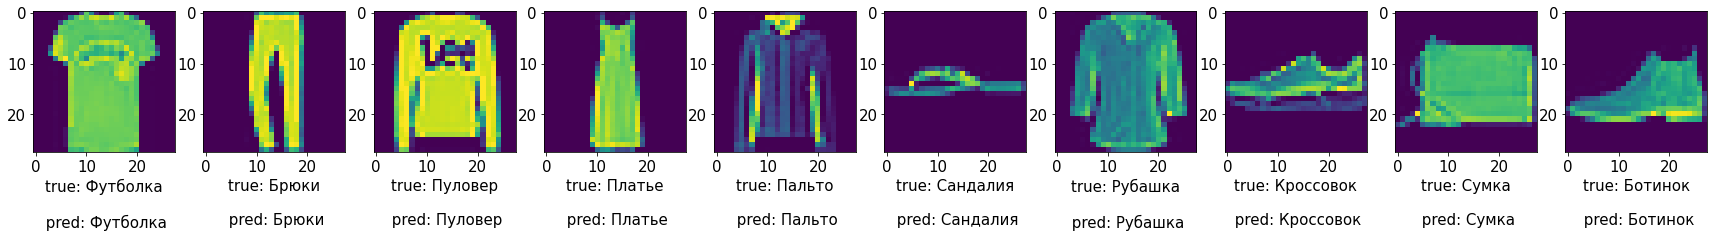

In [37]:
plt.figure(figsize=(3 * 10, 5))
k = 0
for i in ind:
    plt.subplot(1, 10, k+1)
    k+=1
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel('true: ' + str(d[y_test_labels[i]]) + '\n \n pred: ' + str(d[y_pred_class[i]]))

plt.show() 